In [1]:
#import libraries
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from ggplot import *
%matplotlib inline
from __future__ import division

In [2]:
#load the data
csv = 'LiteratureReview_11Mar2015.csv'
data_all = pd.read_csv(csv, header=2)
#select rows without any exclusion comments
data = data_all[data_all['comments'].isnull()]
print 'number of studies included: ', data.shape[0]
NStudies =  data.shape[0]


number of studies included:  150


# Descriptive info on processing parameters

## Preprocessing

### Smoothing

studies that didnt smooth: 23
smoothing mode: 0    6
dtype: float64
smoothing stdev: 1.46470212802


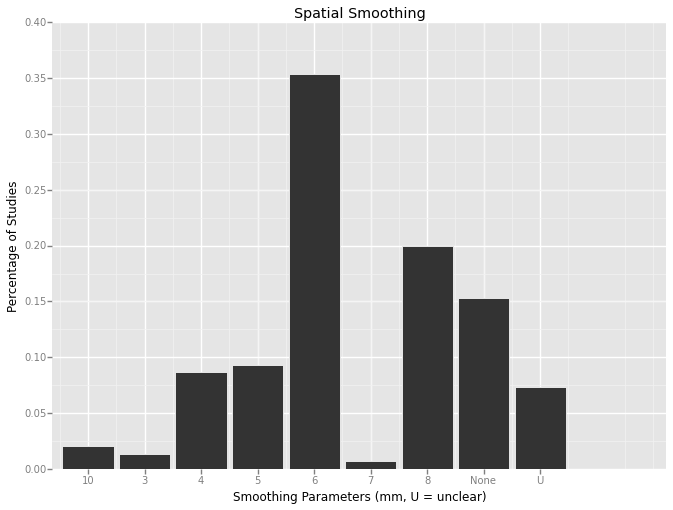

<ggplot: (279216745)>


In [3]:
#find number of studies that did not smooth
print 'studies that didnt smooth:', data['smoothing'].value_counts()['None']
#find mean and stdev of studies that did smooth
smoothed=data[np.logical_and(data['smoothing']!='None',data['smoothing']!='U')]
print 'smoothing mode:', smoothed['smoothing'].astype(float).mode()
print 'smoothing stdev:', smoothed['smoothing'].astype(float).std()
plotdata=data.groupby(['smoothing']).aggregate(np.count_nonzero).reset_index()
plotdata['smoothing_percentage'] = plotdata['name']/NStudies

smoothing_plot = ggplot(aes(x='smoothing', y='smoothing_percentage'), data = plotdata) + geom_bar(stat='bar') \
+ labs(x = 'Smoothing Parameters (mm, U = unclear)') + labs(y = 'Percentage of Studies') \
+ ggtitle('Spatial Smoothing')\

print smoothing_plot
#ggsave(filename="smoothing_percentage_plot.jpg", width=5, height=4, units='in', plot=smoothing_plot)

### STC

studies that did STC: 99


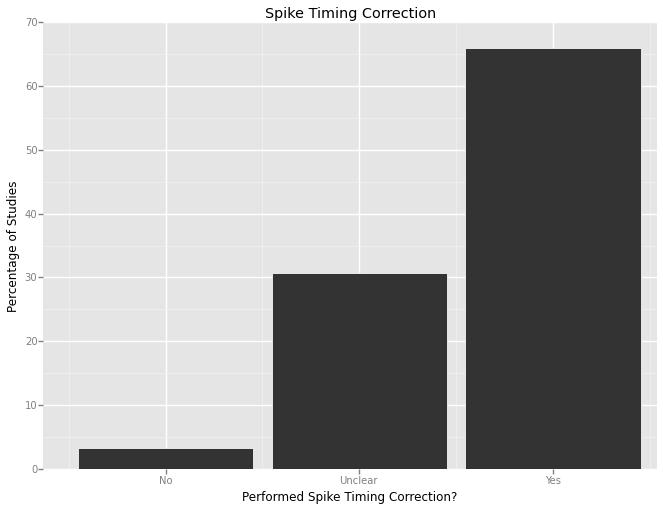

<ggplot: (277636369)>


In [4]:
#find number of studies that did STC or were unclear
print 'studies that did STC:', data['STC'].value_counts()['Y']

plotdata=data.groupby(['STC']).aggregate(np.count_nonzero).reset_index()
plotdata['STC_percentage'] = plotdata['name']/NStudies * 100
plotdata.replace(to_replace = 'N', value = 'No', inplace = True)
plotdata.replace(to_replace = 'Y', value = 'Yes', inplace = True)
plotdata.replace(to_replace = 'U', value = 'Unclear', inplace = True)

STC_plot = ggplot(aes(x='STC', y='STC_percentage'), data = plotdata) + geom_bar(stat='bar') \
+ labs(x = 'Performed Spike Timing Correction?') + labs(y = 'Percentage of Studies') \
+ ggtitle('Spike Timing Correction')\

print STC_plot

#ggsave(filename="STC_percentage_plot.jpg", width=4, height=4, units='in', plot=STC_plot)

### Prescan Normalization

In [27]:
data['prescan_norm'].value_counts()

U    150
dtype: int64

### Head Coil

In [28]:
hc_info = data[data['headcoil']!='U']
print 'head coil info:', hc_info['headcoil'].value_counts()

head coil info: 8        29
12       21
32       16
1         2
16        1
12/32     1
dtype: int64


## Nuisance Regression: Non-GM Signal

Non-GM ROI types:  CSF/WM          100
None             37
U                 7
CSF               2
Other             2
WM                1
CSF/WM/Other      1
dtype: int64


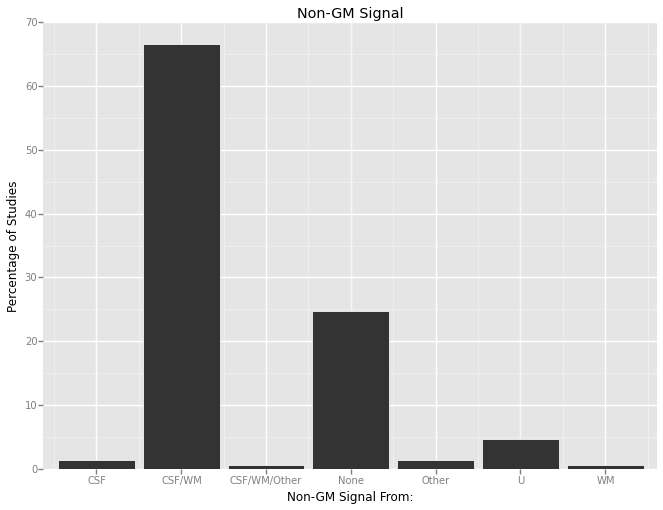

<ggplot: (279454165)>
Non-GM ROI components:  U                59
Mean             31
PC               13
Mean/TD           6
Mean/TD/Other     3
Other             1
dtype: int64


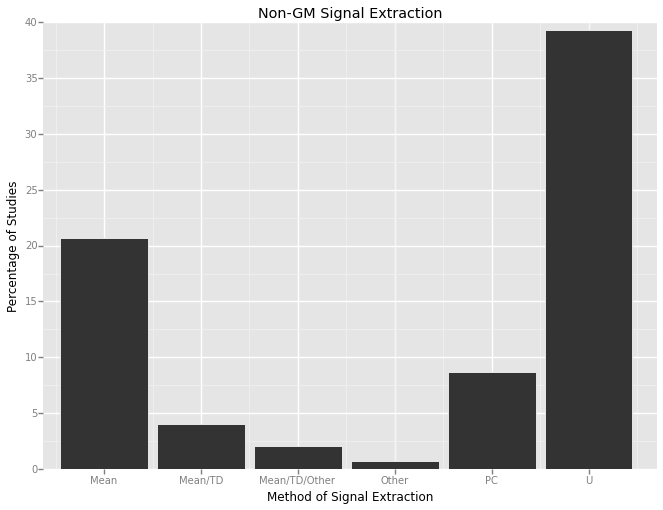

<ggplot: (279465793)>


In [11]:
#ROI info
print 'Non-GM ROI types: ', data['nongm_rois'].value_counts()


plotdata=data.groupby(['nongm_rois']).aggregate(np.count_nonzero).reset_index()
plotdata['nongm_rois_percentage'] = plotdata['name']/NStudies * 100
plotdata
#plotdata.replace(to_replace = 'N', value = 'No', inplace = True)
#plotdata.replace(to_replace = 'Y', value = 'Yes', inplace = True)
#plotdata.replace(to_replace = 'U', value = 'Unclear', inplace = True)

nongm_roi_plot = ggplot(aes(x='nongm_rois', y='nongm_rois_percentage'), data = plotdata)\
+ geom_bar(stat='bar') \
+ labs(x = 'Non-GM Signal From:') + labs(y = 'Percentage of Studies') \
+ ggtitle('Non-GM Signal')\

print nongm_roi_plot

#signal component used from non-gm roi
print 'Non-GM ROI components: ', data['nongm_components'].value_counts()

plotdata=data.groupby(['nongm_components']).aggregate(np.count_nonzero).reset_index()
plotdata['nongm_components_percentage'] = plotdata['name']/NStudies * 100

nongm_component_plot = ggplot(aes(x='nongm_components', y='nongm_components_percentage'), data = plotdata)\
+ geom_bar(stat='bar') \
+ labs(x = 'Method of Signal Extraction') + labs(y = 'Percentage of Studies') \
+ ggtitle('Non-GM Signal Extraction')\

print nongm_component_plot


In [30]:
#PCs if applicable
PC_studies = data[data['nongm_components']=='PC']
print 'number of PC info: ', PC_studies[PC_studies['nongm_pc']!='U']['nongm_pc'].value_counts()

number of PC info:  5     6
10    2
4     1
1     1
dtype: int64


## Nuisance Regression: Global Signal

Global ROI type:  None        77
Yes         59
U            9
Yes/None     3
Yes          1
Other        1
dtype: int64


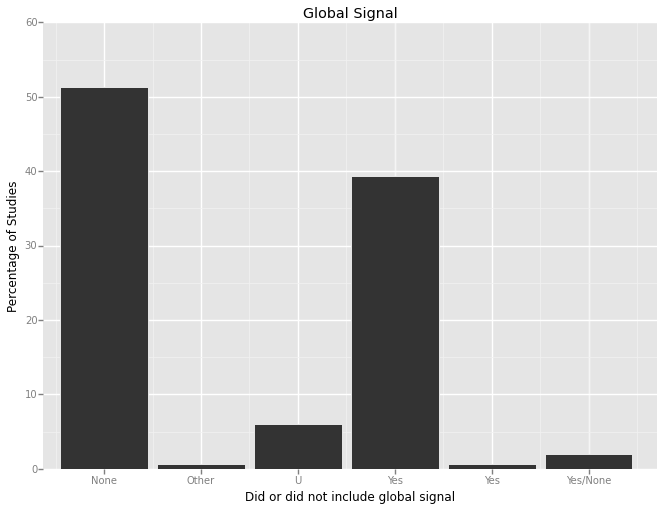

<ggplot: (281510969)>
Global ROI components:  U                41
Mean             23
Mean/TD           5
Mean/TD/Other     3
Other             1
dtype: int64


In [12]:
#ROI info
print 'Global ROI type: ', data['gs_rois'].value_counts()

plotdata=data.groupby(['gs_rois']).aggregate(np.count_nonzero).reset_index()
plotdata['gs_rois_percentage'] = plotdata['name']/NStudies * 100

global_signal_plot = ggplot(aes(x='gs_rois', y='gs_rois_percentage'), data = plotdata)\
+ geom_bar(stat='bar') \
+ labs(x = 'Did or did not include global signal') + labs(y = 'Percentage of Studies') \
+ ggtitle('Global Signal')\

print global_signal_plot

print 'Global ROI components: ', data[data['gs_components']!='None']['gs_components'].value_counts()

## Nuisance Regression: Motion

motion params removed:  6MP                83
None               30
6MP/TD             15
U                  11
6MP/Other           3
6MP/TD/Other/MS     2
6MP/TD/Other        2
6MP/TD/MS           2
6MP/MS              1
Other               1
dtype: int64


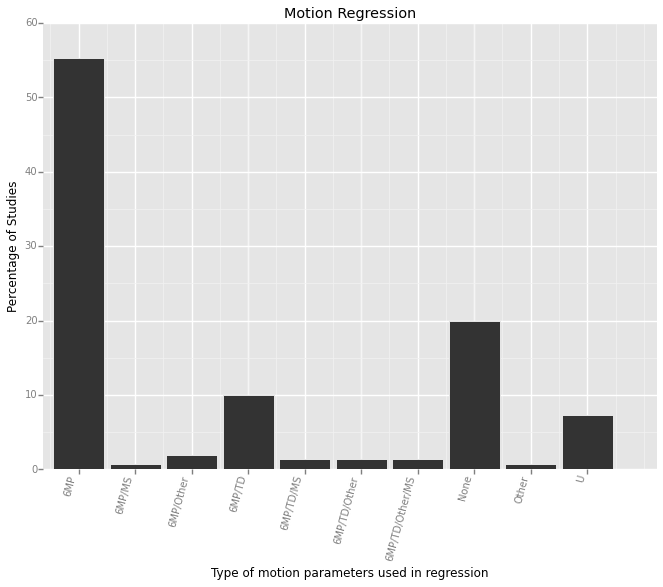

<ggplot: (282785897)>


In [25]:
#which motion paramaters
print 'motion params removed: ', data['mot_trends'].value_counts()

plotdata=data.groupby(['mot_trends']).aggregate(np.count_nonzero).reset_index()
plotdata['mot_trends_percentage'] = plotdata['name']/NStudies * 100

mot_trends_plot = ggplot(aes(x='mot_trends', y='mot_trends_percentage'), data = plotdata)\
+ geom_bar(stat='bar') \
+ labs(x = 'Type of motion parameters used in regression') + labs(y = 'Percentage of Studies') \
+ ggtitle('Motion Regression') + theme(axis_text_x  = element_text(angle = 75, hjust = 1))

print mot_trends_plot

### Scrubbing

number of studies that scrubbed:  19
number studies with iterative scrubbing:  3


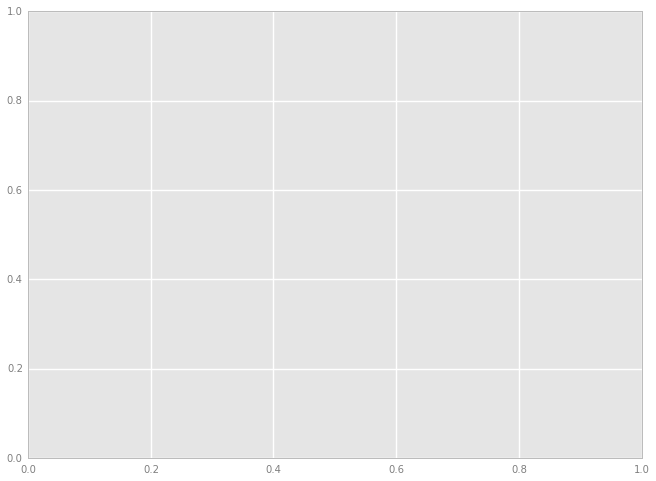

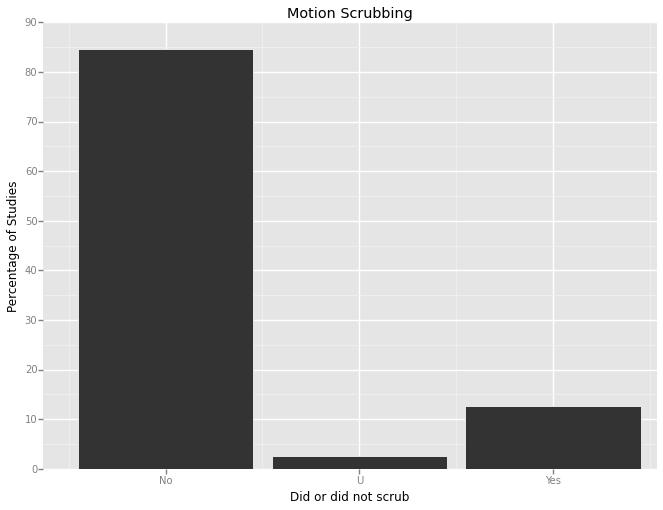

<ggplot: (283315793)>
scrub threshold types:  FD          6
Other       5
FD/DVARS    4
U           3
FD/Other    1
dtype: int64


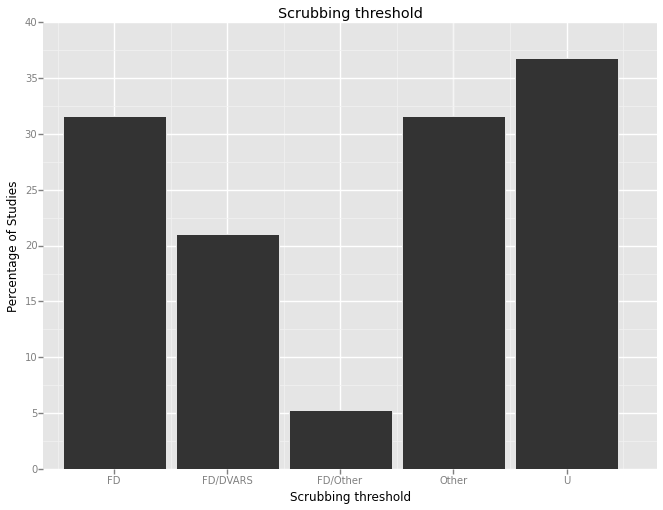

<ggplot: (278912841)>
FD threshold mean:  0.738888888889
DVARS threshold vals:  0.25%    1
0.5      1
dtype: int64
Minimum volumes after scrubbing:  U        14
135       1
125       1
Other     1
262.4     1
300       1
dtype: int64


In [19]:
print 'number of studies that scrubbed: ', data['scrubbing'].value_counts()['Yes']
scrubbed = data[data['scrubbing']=='Yes']
print 'number studies with iterative scrubbing: ', scrubbed['iterative_scrubbing'].value_counts()['Yes']


plotdata=data.groupby(['scrubbing']).aggregate(np.count_nonzero).reset_index()
plotdata['scrubbing_percentage'] = plotdata['name']/NStudies * 100

scrubbing_plot = ggplot(aes(x='scrubbing', y='scrubbing_percentage'), data = plotdata)\
+ geom_bar(stat='bar') \
+ labs(x = 'Did or did not scrub') + labs(y = 'Percentage of Studies') \
+ ggtitle('Motion Scrubbing')\

print scrubbing_plot


print 'scrub threshold types: ', scrubbed['scrub_thresh'].value_counts()
#FD and DVARS info

plotdata=data.groupby(['scrub_thresh']).aggregate(np.count_nonzero).reset_index()
plotdata['scrub_thresh_percentage'] = plotdata['name']/ 19 * 100 

scrub_thresh_plot = ggplot(aes(x='scrub_thresh', y='scrub_thresh_percentage'), data = plotdata)\
+ geom_bar(stat='bar') \
+ labs(x = 'Scrubbing threshold') + labs(y = 'Percentage of Studies') \
+ ggtitle('Scrubbing threshold')\

print scrub_thresh_plot

fd = scrubbed[np.logical_and(scrubbed['fd_thresh']!='U', scrubbed['fd_thresh']!='Other')]
print 'FD threshold mean: ', fd[~fd['fd_thresh'].isnull()]['fd_thresh'].astype(float).mean()
dvars = scrubbed[np.logical_and(scrubbed['dvars_thresh']!='U', scrubbed['dvars_thresh']!='Other')]
print 'DVARS threshold vals: ', dvars[~dvars['dvars_thresh'].isnull()]['dvars_thresh'].value_counts()
#Volumes after scrubbing 
print 'Minimum volumes after scrubbing: ', scrubbed['minvol_postscrub'].value_counts()

## Physio correction and filtering

### Physio correction

physio info:  None    139
U         6
Both      5
dtype: int64


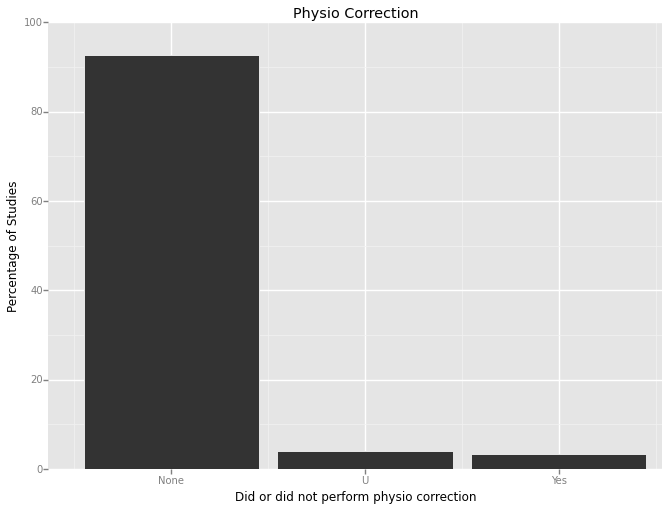

<ggplot: (283097441)>


In [29]:
print 'physio info: ', data['physio'].value_counts()

plotdata=data.groupby(['physio']).aggregate(np.count_nonzero).reset_index()
plotdata['physio_percentage'] = plotdata['name']/NStudies * 100
plotdata.replace(to_replace = 'N', value = 'No', inplace = True)
plotdata.replace(to_replace = 'Both', value = 'Yes', inplace = True)
physio_plot = ggplot(aes(x='physio', y='physio_percentage'), data = plotdata)\
+ geom_bar(stat='bar') \
+ labs(x = 'Did or did not perform physio correction') + labs(y = 'Percentage of Studies') \
+ ggtitle('Physio Correction')\

print physio_plot

### Filtering

type of filtering:  B          90
H          18
None       16
L           9
B/Other     7
U           5
Other       5
dtype: int64


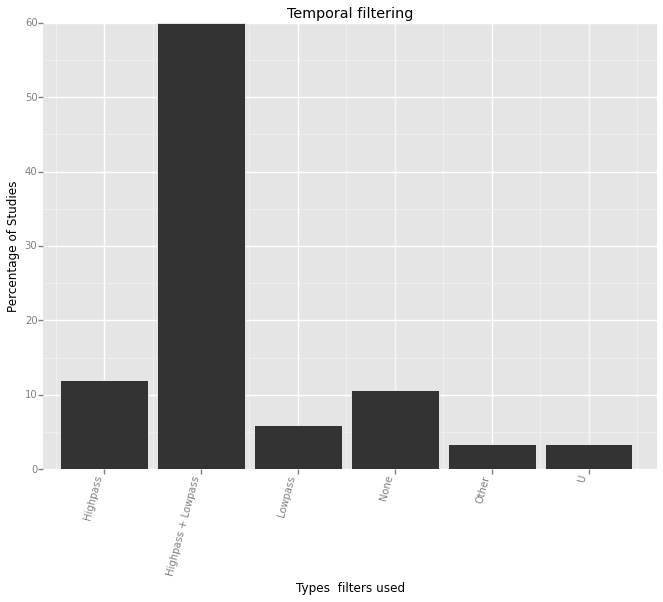

<ggplot: (281663773)>


In [37]:
print 'type of filtering: ', data['filter_type'].value_counts()

plotdata=data.groupby(['filter_type']).aggregate(np.count_nonzero).reset_index()

plotdata.replace(to_replace = 'B', value = 'Highpass + Lowpass', inplace = True)
plotdata.replace(to_replace = 'B/Other', value = 'Other', inplace = True)
plotdata.replace(to_replace = 'H', value = 'Highpass', inplace = True)
plotdata.replace(to_replace = 'L', value = 'Lowpass', inplace = True)

plotdata['filter_type_percentage'] = plotdata['name']/NStudies * 100

filter_type_plot = ggplot(aes(x='filter_type', y='filter_type_percentage'), data = plotdata)\
+ geom_bar(stat='bar') \
+ labs(x = 'Types  filters used') + labs(y = 'Percentage of Studies') \
+ ggtitle('Temporal filtering') + theme(axis_text_x  = element_text(angle = 75, hjust = 1))

print filter_type_plot

In [36]:
filtered = data[data['filter_type']=='B']
filtered_low = filtered[np.logical_and(filtered['lowfreq_filt']!='Other', filtered['lowfreq_filt']!='U')]
filtered_high = filtered[np.logical_and(filtered['highfreq_filt']!='Other', filtered['highfreq_filt']!='U')]
print 'low frequency mode and stdev: ', filtered_low['lowfreq_filt'].astype(float).mode(), filtered_low['lowfreq_filt'].astype(float).std()
print 'high frequency mode and stdev: ', filtered_high['highfreq_filt'].astype(float).mode(), filtered_high['highfreq_filt'].astype(float).std()

low frequency mode and stdev:  0    0.01
dtype: float64 0.0026381555126
high frequency mode and stdev:  0    0.08
dtype: float64 0.0340383258696


In [37]:
filtered.shape

(90, 34)

Filtering/Regression order:  U        64
F        28
R        22
Other     2
S         2
B         1
dtype: int64


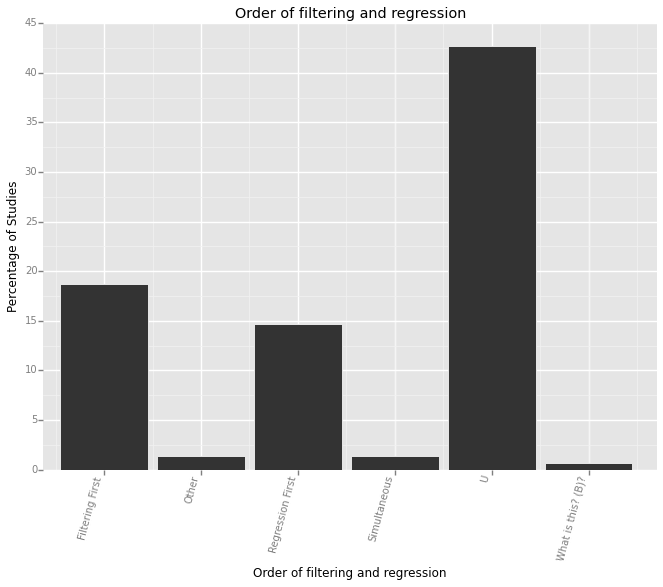

<ggplot: (285046117)>


In [39]:
print 'Filtering/Regression order: ', data[~data['filtreg_order'].isnull()]['filtreg_order'].value_counts()

plotdata=data.groupby(['filtreg_order']).aggregate(np.count_nonzero).reset_index()

plotdata.replace(to_replace = 'B', value = 'What is this? (B)?', inplace = True)
plotdata.replace(to_replace = 'F', value = 'Filtering First', inplace = True)
plotdata.replace(to_replace = 'R', value = 'Regression First', inplace = True)
plotdata.replace(to_replace = 'S', value = 'Simultaneous', inplace = True)

plotdata['filtreg_order_percentage'] = plotdata['name']/NStudies * 100

filtreg_order_plot = ggplot(aes(x='filtreg_order', y='filtreg_order_percentage'), data = plotdata)\
+ geom_bar(stat='bar') \
+ labs(x = 'Order of filtering and regression') + labs(y = 'Percentage of Studies') \
+ ggtitle('Order of filtering and regression') + theme(axis_text_x  = element_text(angle = 75, hjust = 1))

print filtreg_order_plot

### Nuisance ROI info

In [39]:
print 'Nuis ROI info: ', data[~data['nuis_info'].isnull()]['nuis_info'].value_counts()

Nuis ROI info:  U           63
Template    36
Native      19
MNI          1
dtype: int64


## Correlation Parameters

In [40]:
print 'Correlation type: ', data['corr_type'].value_counts()
print 'Correlation method: ', data['corr_method'].value_counts()

Correlation type:  Pearson                  121
Other                     15
Partial                    5
Spectral                   3
Pearson/Partial            2
U                          1
Pearson/Other              1
Pearson/Partial/Other      1
Partial/Other              1
dtype: int64
Correlation method:  Seed              59
ROI               51
ICA               19
Voxel              7
ROI/Seed           7
Seed/ICA           2
ROI/Voxel          1
Seed/ICA/Other     1
Other              1
U                  1
Seed/Voxel         1
dtype: int64


In [41]:
print 'Atlas type if ROI analysis: ', data[~data['roi_info'].isnull()]['roi_info'].value_counts()

Atlas type if ROI analysis:  Other        36
AAL          13
Power         3
U             3
Yeo           2
FS            2
AAL/Other     1
HO            1
dtype: int64


# Information about unclear entries

In [42]:
headers = list(data.columns.values)
print headers[4:]

['smoothing', 'STC', 'prescan_norm', 'headcoil', 'nongm_rois', 'nongm_components', 'nongm_pc', 'nongm_notes', 'gs_rois', 'gs_components', 'gs_notes', 'mot_trends', 'scrubbing', 'iterative_scrubbing', 'scrub_thresh', 'fd_thresh', 'dvars_thresh', 'minvol_postscrub', 'mot_notes', 'physio', 'filter_type', 'lowfreq_filt', 'highfreq_filt', 'filtreg_order', 'physio_notes', 'nuis_info', 'corr_type', 'corr_method', 'roi_info', 'other_notes']


In [43]:
#function to count number of entries that aren't NA
def count_valid(data, header):
    nvalid = data[header].notnull().value_counts()[True]
    return nvalid

In [44]:
hdr = []
uval_total = []
uval_norm = []
exclude = np.array(('nongm_notes','gs_notes','mot_notes','physio_notes','other_notes'))
for header in headers[4:]:
    if header not in exclude:
        hdr.append(header)
        uval_total.append(data[header].value_counts()['U'])
        nvalid = count_valid(data,header)
        print header, nvalid
        uval_norm.append(float(data[header].value_counts()['U'])/nvalid)

smoothing 150
STC 150
prescan_norm 150
headcoil 150
nongm_rois 150
nongm_components 113
nongm_pc 22
gs_rois 150
gs_components 73
mot_trends 150
scrubbing 150
iterative_scrubbing 22
scrub_thresh 24
fd_thresh 19
dvars_thresh 11
minvol_postscrub 25
physio 150
filter_type 150
lowfreq_filt 122
highfreq_filt 115
filtreg_order 119
nuis_info 119
corr_type 150
corr_method 150
roi_info 61


## Unclear entries, normalized by all 128 studies

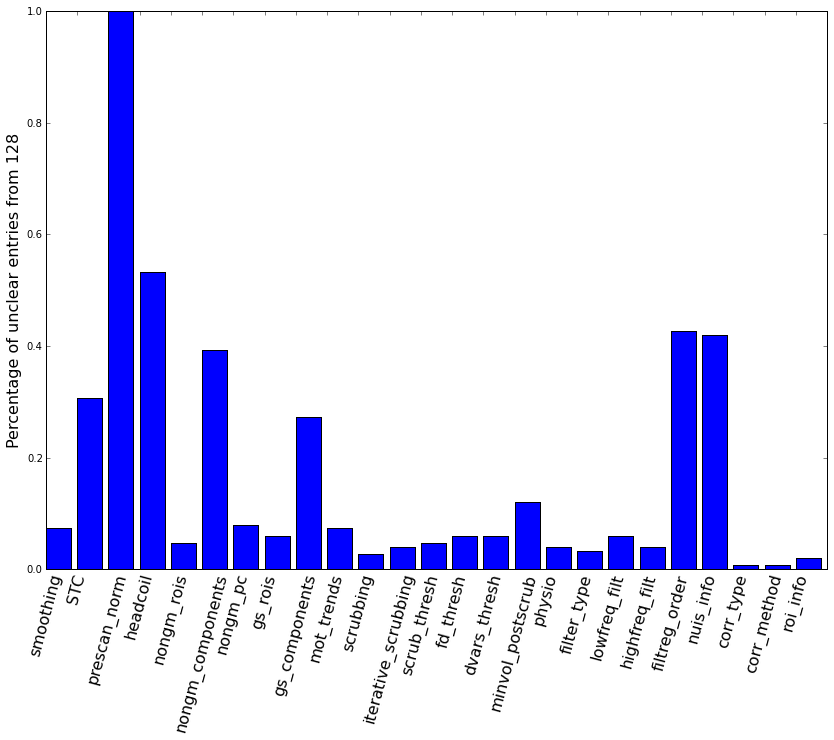

In [45]:
ind = range(len(uval_total))
width = 0.5
plt.figure(figsize=(14,10))
plt.bar(ind,(np.array(uval_total)/float(data.shape[0])))
plt.xticks(ind,hdr, rotation=75, fontsize=16)
plt.ylabel('Percentage of unclear entries from 128', fontsize=16)

In [46]:
print 'Top 5 parameters with most unclear entries: ', np.array(hdr)[np.array(uval_total).argsort()[::-1][:5]]

Top 5 parameters with most unclear entries:  ['prescan_norm' 'headcoil' 'filtreg_order' 'nuis_info' 'nongm_components']


## Unclear entries, normalized by whether that step was done

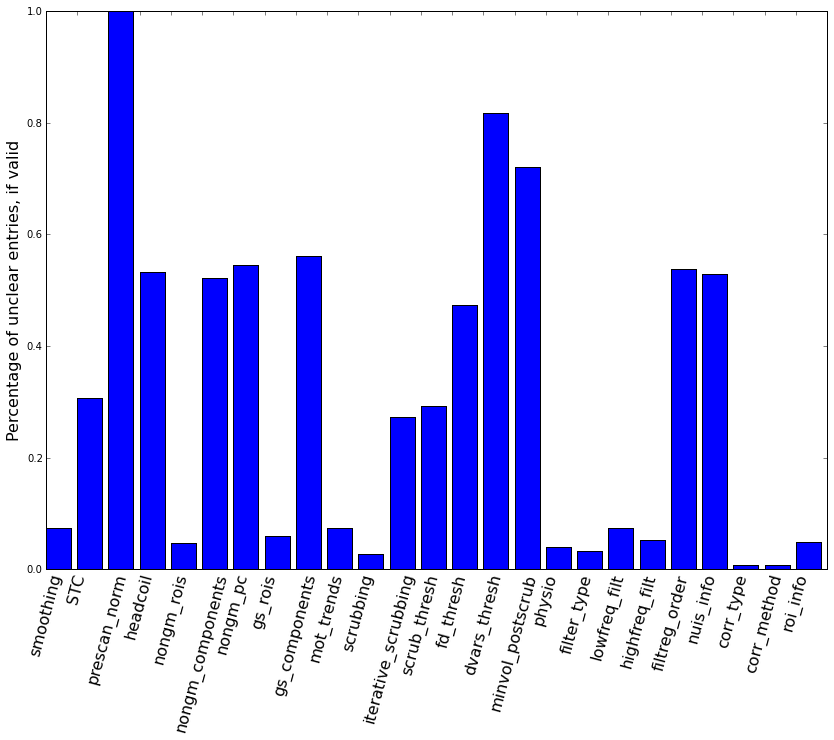

In [47]:
plt.figure(figsize=(14,10))
plt.bar(ind,uval_norm)
plt.xticks(ind,hdr, rotation=75, fontsize=16)
plt.ylabel('Percentage of unclear entries, if valid', fontsize=16)

In [48]:
print 'Parameters with unclear info in more than 30% of studies:', np.array(hdr)[np.array(uval_norm)>0.3]

Parameters with unclear info in more than 30% of studies: ['STC' 'prescan_norm' 'headcoil' 'nongm_components' 'nongm_pc'
 'gs_components' 'fd_thresh' 'dvars_thresh' 'minvol_postscrub'
 'filtreg_order' 'nuis_info']
